In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

pandas (pd): Used for data manipulation and analysis.

numpy (np): Provides support for numerical operations.

matplotlib.pyplot (plt): Used for visualizing data through graphs.

seaborn (sns): Built on top of Matplotlib, used for statistical data visualization.

sklearn.model_selection (train_test_split): Splits dataset into training and testing sets.

sklearn.preprocessing (StandardScaler, LabelEncoder): Used for feature scaling and encoding categorical variables.

In [3]:
df = pd.read_csv("C:/Users/amama/Downloads/Crop_recommendation.csv")

Loads the dataset into a Pandas DataFrame.

In [11]:
# Remove duplicates
df = df.drop_duplicates()


Removes duplicate rows to avoid bias in the model.

In [14]:
# Fix column names (strip extra spaces)
df.columns = df.columns.str.strip()

Strips any leading or trailing spaces from column names.

In [15]:
# Display dataset summary
print("\nDataset Summary:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB
None

First 5 Rows:
    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  

Displays information about the dataset, including column types and missing values.

Prints the first 5 rows for an overview.

In [16]:
# Handle missing values (if any)
print("\nMissing Values Before Handling:")
print(df.isnull().sum())  # Check for missing values

# Check for missing values and handle them if necessary
df = df.dropna()


Missing Values Before Handling:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Checks for missing values and removes them to ensure a clean dataset.

In [17]:
# Display the number of rows and columns
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (2200, 8)


Displays the number of rows and columns in the cleaned dataset.

In [5]:
# Encode target variable (label encoding for categorical target)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

Converts the crop names (categorical) into numerical values for machine learning models.

In [6]:
# Splitting features and target
X = df.drop(columns=['label'])
y = df['label']

In [7]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splitting the Dataset

X: Contains independent features (excluding label).
y: Contains the target variable (label).
Splits data into training (80%) and testing (20%) sets.
Uses stratify=y to ensure balanced class distribution.

In [8]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Feature Scaling
Standardizes numerical features to ensure a consistent scale for machine learning models.

In [9]:
# Convert standardized arrays back to DataFrame for visualization
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Display the first five rows of the processed training data
print("Processed Training Data:")
print(X_train_df.head())

# Display the first five rows of the encoded target variable
print("\nEncoded Target Labels:")
print(y_train[:5])


Processed Training Data:
          N         P         K  temperature  humidity        ph  rainfall
0 -1.371628 -1.072910 -0.673510     0.819481  0.924395  0.937545  0.199440
1 -1.127411  2.084513  3.015261     0.783251  0.426613 -1.153846 -0.643677
2 -1.073140  0.536162 -0.476250    -0.879968 -2.186291 -1.107452  0.694001
3 -0.340487 -0.465713 -0.594606     0.138043 -0.459237 -0.229482 -1.231744
4 -0.883193 -1.255069 -0.791866    -2.563232  0.915842 -0.341959  0.289941

Encoded Target Labels:
1607    16
1212     7
362      9
566     13
1671    16
Name: label, dtype: int32


In [10]:
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")



Number of rows in the dataset: 2200


In [22]:
# Identify categorical and numerical columns
categorical_cols = ['label']  # If there are any categorical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]


<Figure size 1200x800 with 0 Axes>

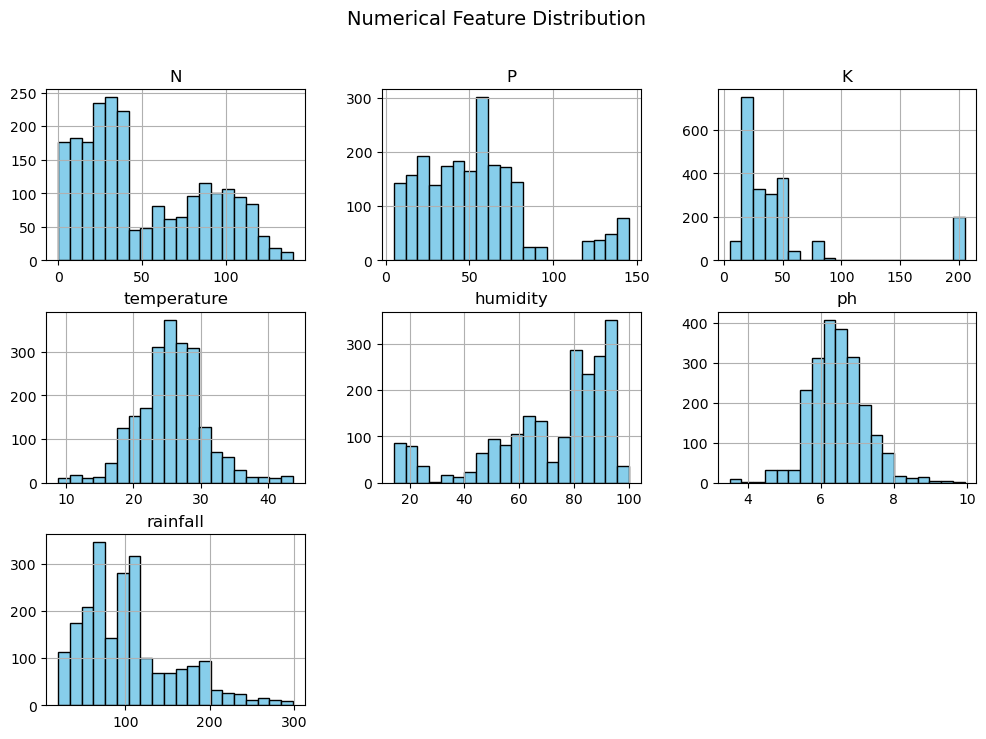

In [24]:
#  **Distribution of numerical features**
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distribution", fontsize=14)
plt.show()

Histogram - Numerical Feature Distribution

Plots histograms to show the distribution of numerical features

<Figure size 1200x600 with 0 Axes>

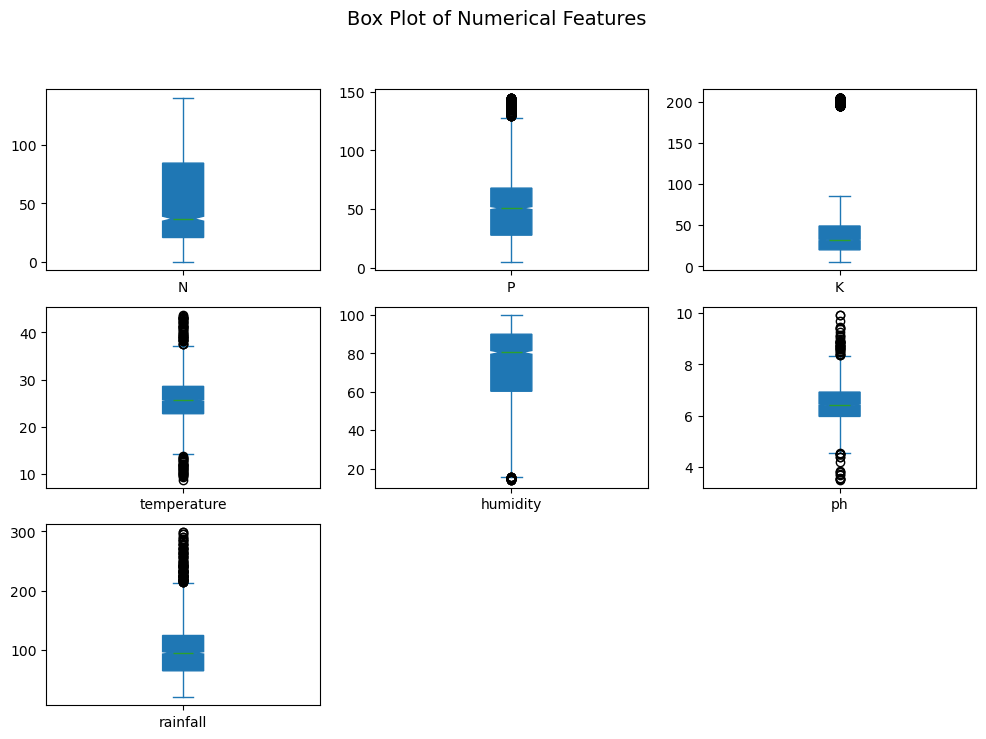

In [25]:
# **Box plot to check for outliers**
plt.figure(figsize=(12, 6))
df[numerical_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), notch=True, patch_artist=True)
plt.suptitle("Box Plot of Numerical Features", fontsize=14)
plt.show()

Box Plots - Identifying Outliers
Uses box plots to identify outliers in numerical features.

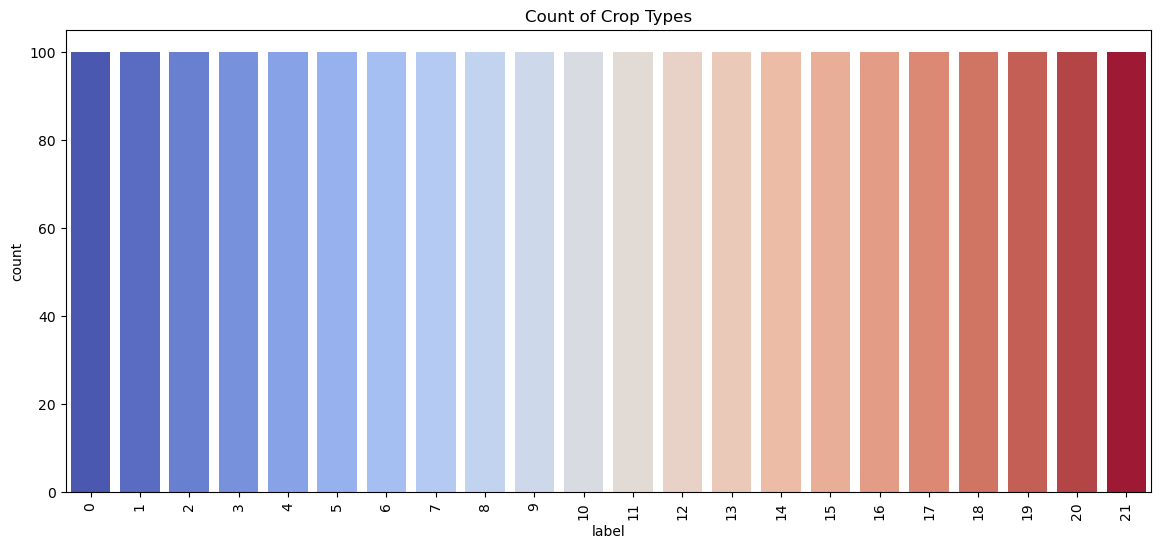

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(x='label', data=df, hue='label', palette='coolwarm', legend=False)
plt.title("Count of Crop Types")
plt.xticks(rotation=90)
plt.show()


Count Plot - Distribution of Crop Types
Shows the distribution of crop types in the dataset.

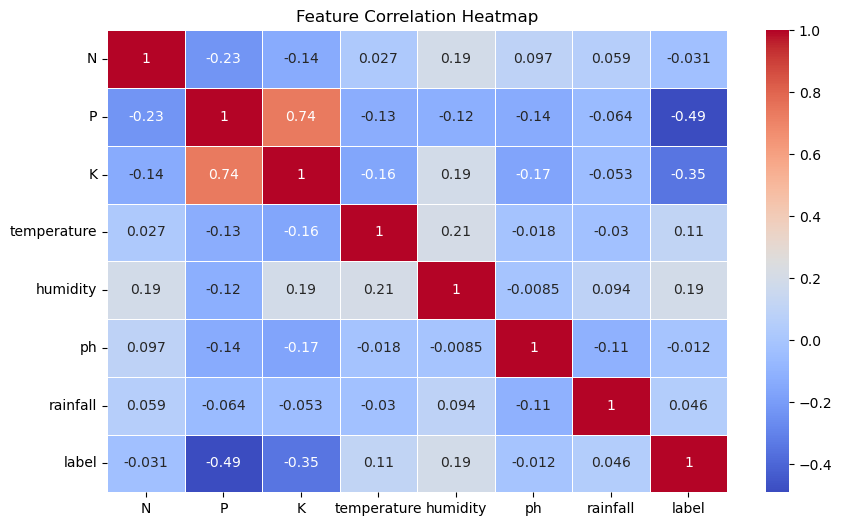

In [28]:
# **Correlation Heatmap**
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Correlation Heatmap
Displays the correlation between different features, helping identify relationships between them.

this code:

Loads and cleans the dataset.
Checks for missing values and removes them.
Encodes categorical values (Crop Type).
Splits data into training and test sets.
Standardizes numerical features.
Visualizes the dataset using graphs.